In [1]:
import pandas as pd
from os.path import exists
import matplotlib.pyplot as plt
# Importation of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## La 5G

In [2]:
# Importing database
df = pd.read_csv("../../database/data-5G.csv", sep=",")
df = df[df['LIBGEO']=='France Métropolitaine']
df

,NIVGEO,CODGEO,LIBGEO,nom_operateur,date,nb_sites5G_freq_700_800_MHz,nb_sites5G_freq_1800_2100_MHz,nb_sites5G_freq_3500_MHz,nb_sites5G_total
144,ZONE,FRMET,France Métropolitaine,Bouygues Telecom,2020-11-30,0,0,0,0
145,ZONE,FRMET,France Métropolitaine,Bouygues Telecom,2020-12-31,0,1459,145,1500
146,ZONE,FRMET,France Métropolitaine,Bouygues Telecom,2021-01-31,0,1819,275,1885
147,ZONE,FRMET,France Métropolitaine,Bouygues Telecom,2021-02-28,0,1960,325,2030
148,ZONE,FRMET,France Métropolitaine,Bouygues Telecom,2021-03-31,0,2091,491,2263
...,...,...,...,...,...,...,...,...,...
211,ZONE,FRMET,France Métropolitaine,SFR,2022-12-31,0,5452,5734,8386
212,ZONE,FRMET,France Métropolitaine,SFR,2023-03-31,0,5870,6008,8936
213,ZONE,FRMET,France Métropolitaine,SFR,2023-06-30,0,6299,6511,9558
214,ZONE,FRMET,France Métropolitaine,SFR,2023-09-30,0,6688,6911,10075


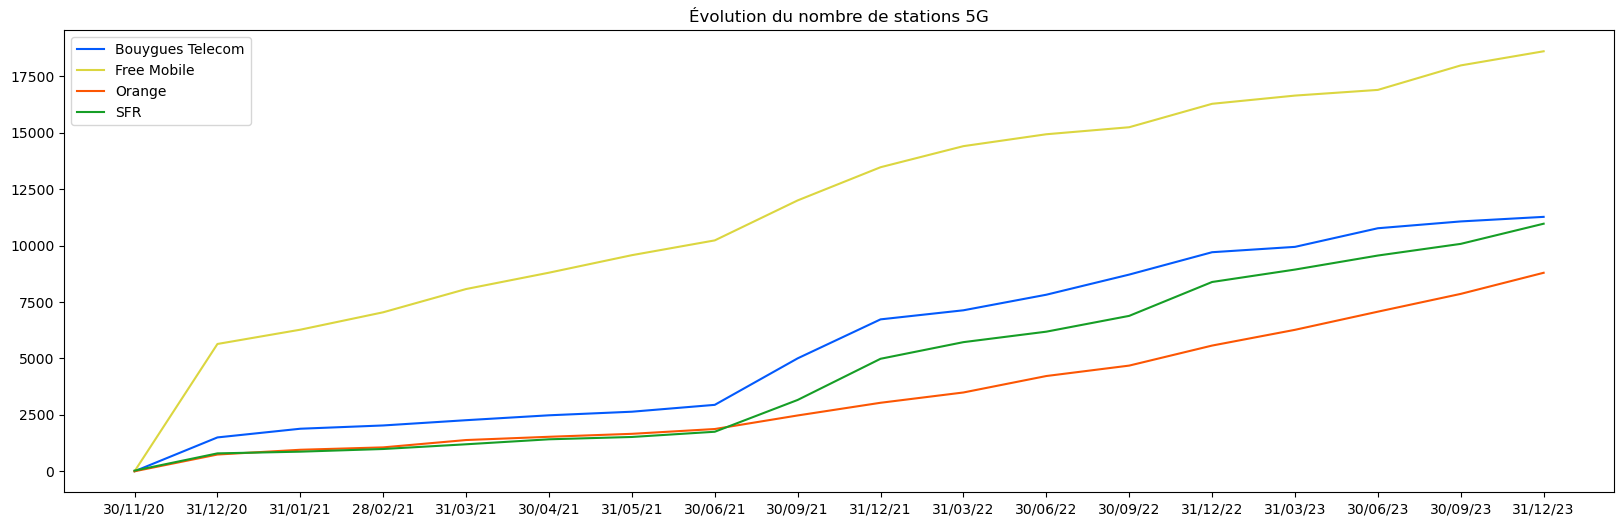

In [3]:
providers =df['nom_operateur'].unique()
labelsToColors={'Bouygues Telecom':'#035afc', 'Orange':'#fc5603', 'SFR':'#169e26', 'Free Mobile':'#dbd640'}
plt.figure(figsize=(20,6))
for provider in providers:
    color = labelsToColors.get(provider)
    df_operator = df[df['nom_operateur']==provider]
    plt.plot(df_operator['date'].apply(lambda date : datetime.strptime(date, '%Y-%m-%d').strftime('%d/%m/%y')), df_operator['nb_sites5G_total'], color=color, label = provider)
plt.legend(loc="upper left")
plt.title("Évolution du nombre de stations 5G")
plt.savefig("../../out/images/5G-evolution", dpi = 100)

plt.show()

## Toutes les technos

In [4]:
datas = dict()
for year in range(2017,2024):
    for quarter in range(1,5):
        path_to_file = f"../../database/{year}_T{quarter}_sites_Metropole.csv"
        if (exists(path_to_file)):
            data  = pd.read_csv(path_to_file, engine='python', sep=";")
            if ('site_5g' in data):
                datas[(year, quarter)] = data[['site_2g','site_3g','site_4g','site_5g','code_op']]
            else :
                datas[(year, quarter)] = data[['site_2g','site_3g','site_4g','code_op']]

In [5]:
providerToCode = dict({'Orange' : 20801, 'Free Mobile' : 20815, 'SFR' : 20810, 'Bouygues Telecom' : 20820})
dates = [(year, quarter) for year in range(2017,2024) for quarter in range(1,5) if not(year==2017 and quarter <=2)]
dates_formatted = [f"{y}-T{q}" for (y,q) in dates]

In [6]:
stations_counts_providers = dict()
for provider in providers:
    stations_counts = dict()
    for (year, quarter) in dates:
        counts = []
        if((year, quarter) in datas):
            data_all_providers = datas.get((year, quarter))
            data_provider = data_all_providers.loc[data_all_providers['code_op']==providerToCode.get(provider)]
            for techno in ['site_2g','site_3g','site_4g','site_5g']:
                if (techno in data_provider):
                    counts.append(data_provider[techno].sum())
                else :
                    counts.append(0)
            stations_counts[(year, quarter)]=counts
    stations_counts_providers[provider]=stations_counts

In [7]:
generations_date_counts=[[[stations_counts_providers.get(provider).get((year, quarter),[0,0,0,0])[techno] for year,quarter in dates] for techno in range(4)] for provider in providers]

### Evolution du nombre de stations de bases pour chaque techno

/tmp/ipykernel_48118/2212931902.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(technologies)//2, len(technologies)-len(technologies)//2, j+1)
/tmp/ipykernel_48118/2212931902.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(technologies)//2, len(technologies)-len(technologies)//2, j+1)


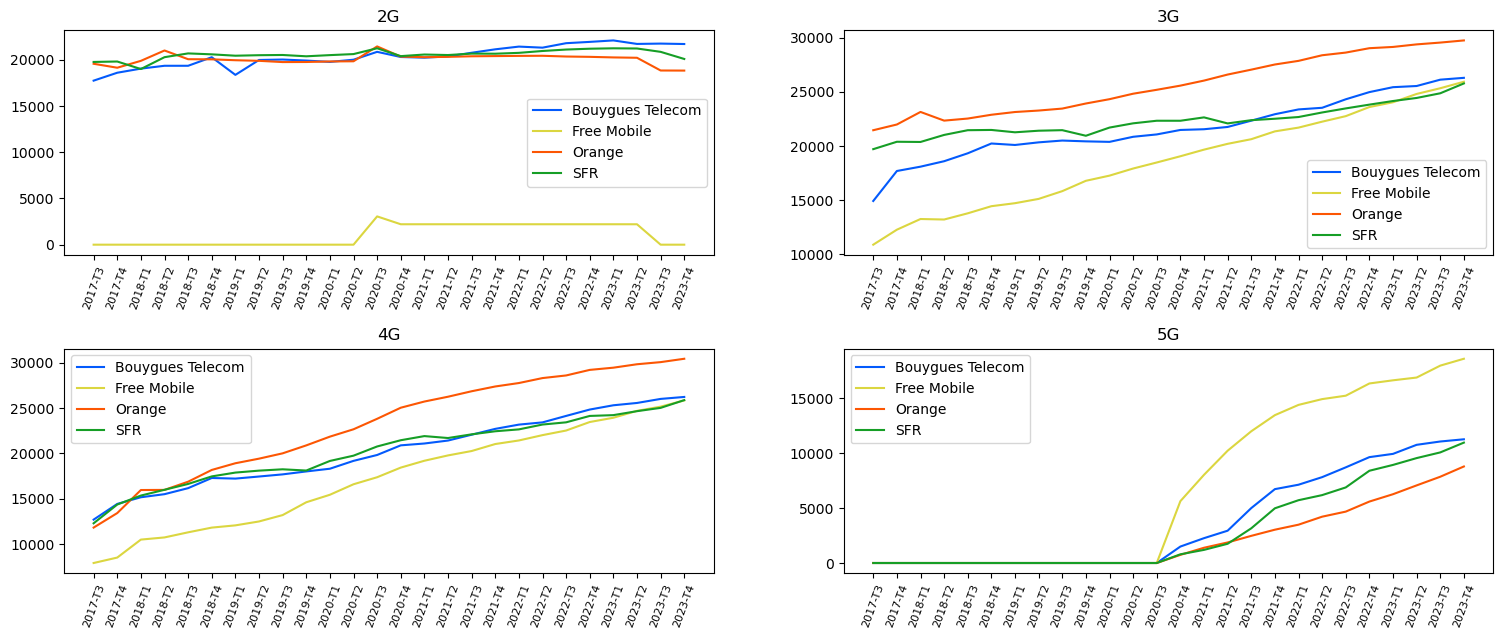

In [43]:

technologies = [f'{i}G' for i in range(2,6)]
providerToColor={'Bouygues Telecom':'#035afc', 'Orange':'#fc5603', 'SFR':'#169e26', 'Free Mobile':'#dbd640'}
fig, axes = plt.subplots(len(technologies), 1, figsize=(15, 6))
fig.tight_layout(pad=1.0)
# plt.subplots_adjust(top=1.6)
for j,techno in enumerate(technologies):
    plt.subplot(len(technologies)//2, len(technologies)-len(technologies)//2, j+1)
    plt.title(techno)

    for i, provider in enumerate(providers):
        plt.plot(dates_formatted,generations_date_counts[i][j], label = provider, color=providerToColor.get(provider))
        plt.xticks(rotation=70)
        plt.gca().xaxis.set_tick_params(labelsize = 8)
        plt.legend()

plt.savefig("../../out/images/technos-evolution", dpi = 100,pad_inches=3)
plt.show()